In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


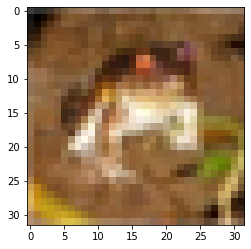

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255


In [13]:
# Create The architecture of the model
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# Adding a flatting layer
model.add(Flatten())
# Adding layers
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))




In [14]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [15]:
hist = model.fit(x_train,y_train_one_hot,batch_size = 32,epochs = 50,validation_split = 0.2)

Epoch 1/50
1250/1250 [==============================] - 74s 59ms/step - loss: 1.5772 - accuracy: 0.4195 - val_loss: 1.3033 - val_accuracy: 0.5370
Epoch 2/50
1250/1250 [==============================] - 73s 58ms/step - loss: 1.2717 - accuracy: 0.5453 - val_loss: 1.1937 - val_accuracy: 0.5786
Epoch 3/50
1250/1250 [==============================] - 74s 59ms/step - loss: 1.1278 - accuracy: 0.5989 - val_loss: 1.1400 - val_accuracy: 0.6014
Epoch 4/50
1250/1250 [==============================] - 73s 59ms/step - loss: 1.0039 - accuracy: 0.6459 - val_loss: 1.0404 - val_accuracy: 0.6402
Epoch 5/50
1250/1250 [==============================] - 74s 59ms/step - loss: 0.9095 - accuracy: 0.6786 - val_loss: 1.0168 - val_accuracy: 0.6484
Epoch 6/50
1250/1250 [==============================] - 74s 59ms/step - loss: 0.8193 - accuracy: 0.7085 - val_loss: 1.0179 - val_accuracy: 0.6574
Epoch 7/50
1250/1250 [==============================] - 75s 60ms/step - loss: 0.7449 - accuracy: 0.7345 - val_loss: 0.9781 -

In [16]:
# Evaluate the model
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 1.9849 - accuracy: 0.6554


[1.9848644733428955, 0.6553999781608582]

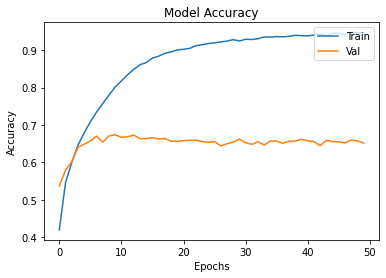

In [17]:
# Vishualize the model`s accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()

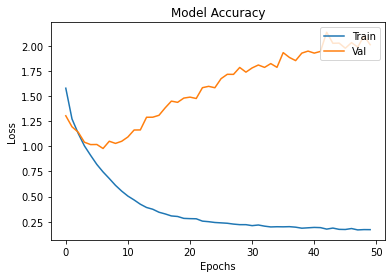

In [18]:
# Visualize the model`s loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()

In [19]:
# Try on an example
from google.colab import files
uploadedImage = files.upload()

Saving pp.jpg to pp.jpg


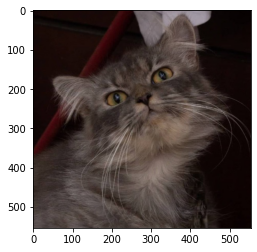

In [21]:
# Show the image
newImage = plt.imread('pp.jpg')
img = plt.imshow(newImage)

In [22]:
# Resize the image
from skimage.transform import resize
resizedImage = resize(newImage,(32,32,3))


In [26]:
predictions = model.predict(np.array([resizedImage]))

In [29]:
classifications = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truch']

In [31]:
classifications[np.argmax(predictions)]

'cat'